## Data Description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

This dataset contains 200 columns and 5 columns.We have to predict the sales and find out which channel is best to earn more revenue

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("advertising_channel.csv")
df

,Sl,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['Sl', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sl         200 non-null    int64  
 1   TV         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.dtypes

Sl             int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
#Dimension of the dataset
df.shape

(200, 5)

In [7]:
#Statistical Summary
df.describe()

,Sl,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.drop('Sl',axis=1,inplace=True)

In [9]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
#Checking the null values in the set
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

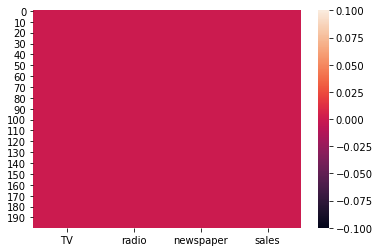

In [11]:
sns.heatmap(df.isnull())

So there is no null values in the dataset.

## Data Visualization

In [12]:
#Univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024850F20AC0>,
      dtype=object)

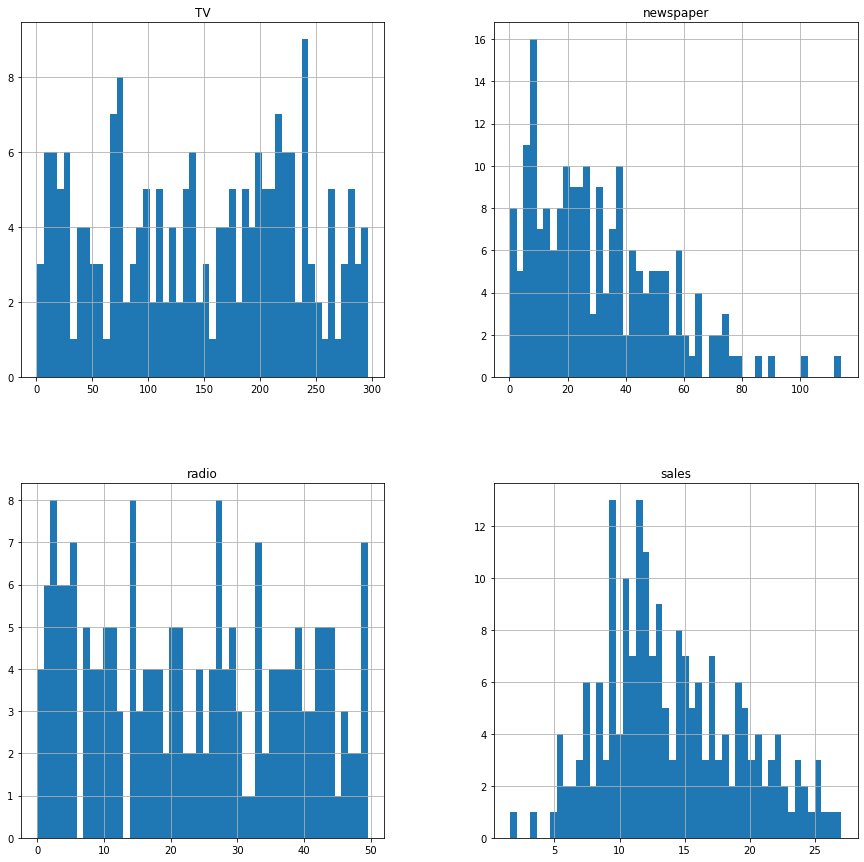

In [13]:
df.hist(bins=50,figsize=(15,15))

In [14]:
#Bivariate Analysis

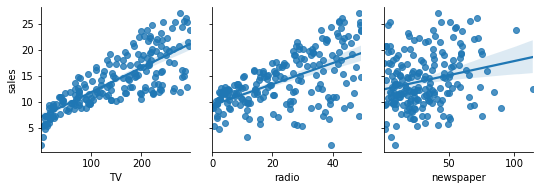

In [15]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',aspect=1, kind='reg')

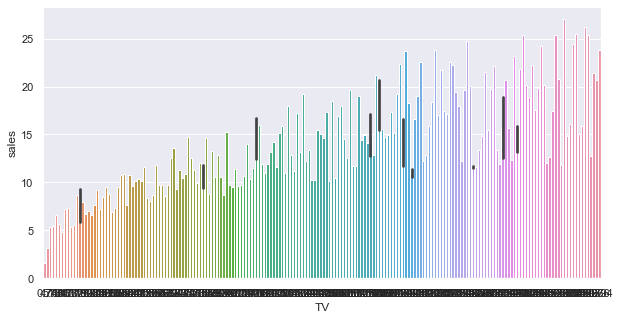

In [16]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
ax = sns.barplot(x='TV', y='sales', data=df)
plt.show()

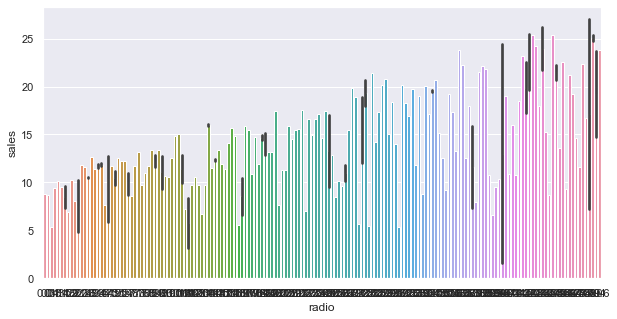

In [17]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
ax = sns.barplot(x='radio', y='sales', data=df)
plt.show()

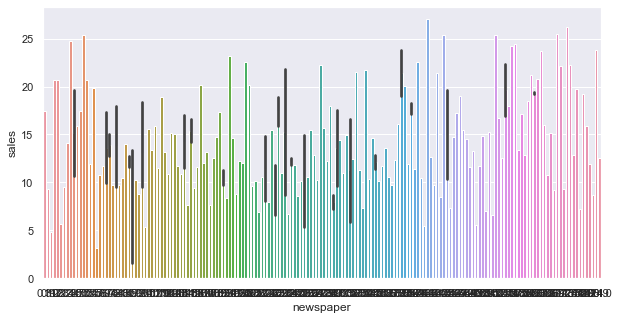

In [18]:
sns.set(font_scale=1)
plt.figure(figsize=(10,5))
ax = sns.barplot(x='newspaper', y='sales', data=df)
plt.show()

*  TV -advertising through TV earns maximum revenue.if we spent more in TV revenue will also increase

* radio -graph for radio also shows that revenue increases with radio advertising.

* newspaper - the graph is not clear.data is spreaded.

In [19]:
#multivariate analysis

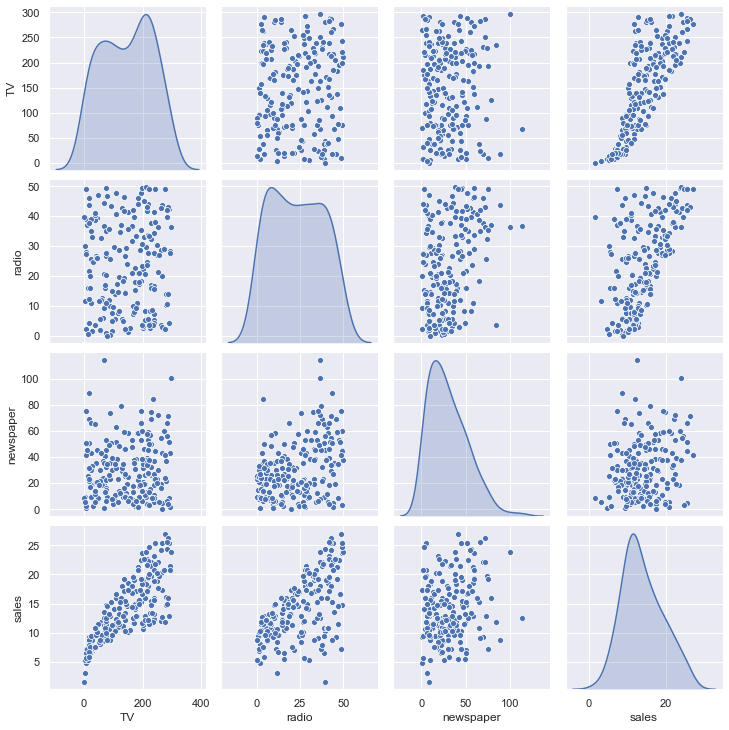

In [20]:
sns.pairplot(df,x_vars=['TV','radio','newspaper','sales'],y_vars=['TV','radio','newspaper','sales'],diag_kind='kde')
plt.show()

## Checking Correlation

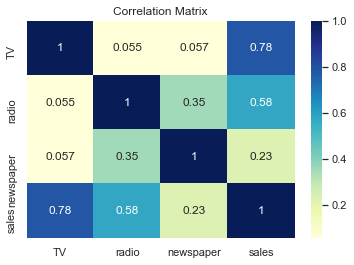

In [21]:
#Lets check correlation between different variables
corr_mat=df.corr()

sns.heatmap(corr_mat,annot=True,cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

In [22]:
x=df.drop('sales',axis=1)
y=df['sales']

## Distribution of data among all columns

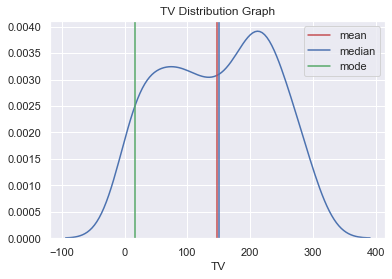

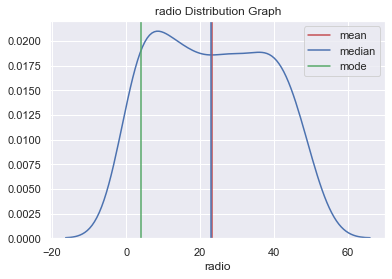

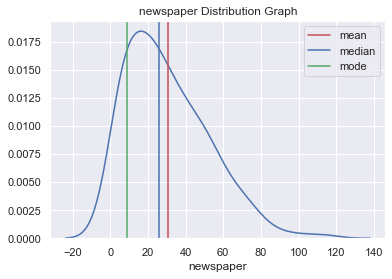

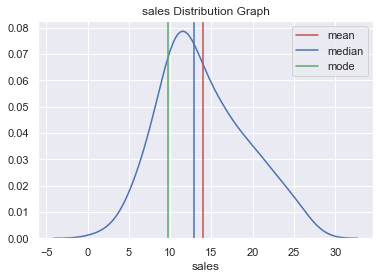

In [23]:
def dist_plots(dataframe):
    for col in dataframe.columns:
        sns.distplot(dataframe[col],hist=False).set_title(f"{col} Distribution Graph")
        plt.axvline(dataframe[col].mean(),color='r',label='mean')
        plt.axvline(np.median(dataframe[col]),color='b',label='median')
        plt.axvline((dataframe[col].mode())[0],color='g',label='mode')
        plt.legend()
        plt.show();

dist_plots(df)

## Checking Skewness of the dataset

In [24]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

We are using Power_transform function to remove the skewness.


In [25]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [26]:
df_new.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

In [27]:
x=df_new

In [28]:
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


## Checking outliers

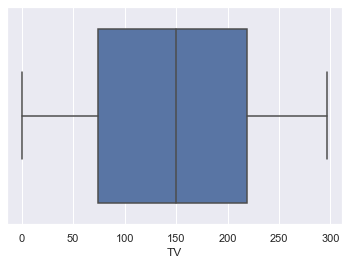

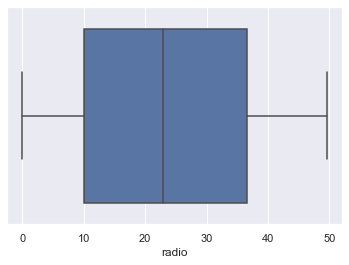

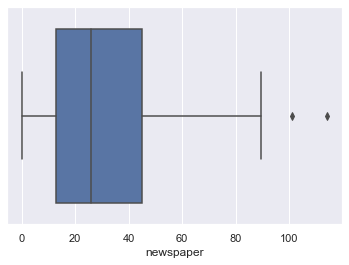

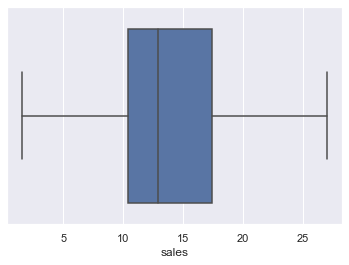

In [29]:
for i in ['TV','radio','newspaper','sales']:
       
    
    sns.boxplot(df[i])
    plt.show()

There is no outliers in the dataset.

In [30]:
x.shape

(200, 3)

In [31]:
y.shape

(200,)

## Finding best random state

In [32]:
lr=LinearRegression()

In [33]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9113454294369951
At random state 0,the testing accuracy is:- 0.8906859162630235


At random state 1,the training accuracy is:- 0.9009275543326652
At random state 1,the testing accuracy is:- 0.9193233112889228


At random state 2,the training accuracy is:- 0.925591859138195
At random state 2,the testing accuracy is:- 0.8498737418691555


At random state 3,the training accuracy is:- 0.9092272415482604
At random state 3,the testing accuracy is:- 0.8942939969076622


At random state 4,the training accuracy is:- 0.9029461135515425
At random state 4,the testing accuracy is:- 0.9129620436353407


At random state 5,the training accuracy is:- 0.909901461290118
At random state 5,the testing accuracy is:- 0.8977631357987814


At random state 6,the training accuracy is:- 0.9125450438210801
At random state 6,the testing accuracy is:- 0.8873012805320627


At random state 7,the training accuracy is:- 0.9070383922765595
At random state 7,the testing accur

## Train_Test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=31)

In [35]:
x_train.shape

(134, 3)

In [36]:
x_test.shape

(66, 3)

In [37]:
y_train.shape

(134,)

In [38]:
y_test.shape

(66,)

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
pred_test=lr.predict(x_test)

In [41]:
print(r2_score(y_test,pred_test))

0.9095105556306285


In [42]:
print(lr.coef_)
print(lr.intercept_)

[4.00877528 2.58689028 0.16526182]
13.999174325845324


In [43]:
lr_coef = pd.DataFrame(lr.coef_,x_test.columns,columns=['Coeffiecients'])
lr_coef

,Coeffiecients
TV,4.008775
radio,2.586890
newspaper,0.165262


#### The result says that if the advertisments through TV increases 1 unit then it will affect the sales by 4.008 units

### So we can infer that advertising through the sales channel TV generate the good revenue

## Cross validation

In [44]:
Train_accuracy=(y_train,pred_train)
Test_accuracy=(y_test,pred_test)

score=cross_val_score(lr,x,y,cv=5)
print('Score:',score)

print('Cross validation score',score.mean())
print('Standard deviation',score.std())
print('accuracy score for training', Train_accuracy)
print('accuracy score for testing', Test_accuracy)   
print("\n")

Score: [0.89865438 0.92315321 0.90551551 0.86703848 0.89466863]
Cross validation score 0.8978060430607069
Standard deviation 0.018216042406885524
accuracy score for training (114    14.6
64     18.0
129     9.7
50     11.4
23     15.5
       ... 
151    11.6
98     25.4
126     6.6
16     12.5
87     16.0
Name: sales, Length: 134, dtype: float64, array([ 9.82649689,  7.09972848, 13.31282177,  9.53236843, 12.65970744,
       17.85895702, 23.80885679, 17.4423346 , 13.36506033, 12.41057231,
       20.66032354, 19.5999583 ,  5.57816126, 15.20090444, 18.23100505,
       18.25014488,  9.15052719, 17.47445064, 18.78689792,  5.73471562,
       14.54707697, 11.44380795, 22.62637477, 13.29880177, 10.27901779,
       10.07819399,  9.88271702, 18.78963618, 15.23127067, 11.79170093,
        7.05166486, 14.99253762, 21.13333373,  8.8055927 , 23.90762127,
       15.25391011, 15.50720456, 21.37362568, 13.9080218 , 16.94115027,
       19.50236345, 16.36755209, 20.57310692,  7.45026539,  6.80199306,
   

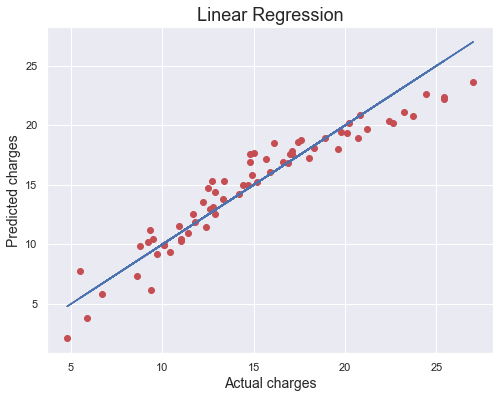

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

#### Best fit line is covering most of the datapoints which shows good fit of our model

## Fitting Non linear models

In [46]:
model=[DecisionTreeRegressor(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(r2_score(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(mean_absolute_error(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeRegressor() is:
0.9269053739077812
1.9498484848484852
1.0863636363636364


Accuracy score of SVR() is:
0.8909932331331533
2.907829078233418
1.0776814382711366


Accuracy score of RandomForestRegressor() is:
0.9612205762103093
1.0344673030302975
0.793606060606059


Accuracy score of GradientBoostingRegressor() is:
0.9782391808022567
0.5804845391540819
0.5738258349511812


Accuracy score of KNeighborsRegressor() is:
0.9316758078624267
1.822593939393939
0.9981818181818181




## Cross validation of models

In [47]:
model=[DecisionTreeRegressor(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),KNeighborsRegressor()]

for m in model:
    
    score=cross_val_score(m,x,y,cv=5)
    print('Cross validation score of',m,'is:')
    print('Score:',score)

    print('Cross validation score',score.mean())
    print('Standard deviation',score.std())
    print('\n')

Cross validation score of DecisionTreeRegressor() is:
Score: [0.9603056  0.94932798 0.94234664 0.95916818 0.96509883]
Cross validation score 0.9552494459095875
Standard deviation 0.00823987543911011


Cross validation score of SVR() is:
Score: [0.90772364 0.95272121 0.94017345 0.85251614 0.93255901]
Cross validation score 0.9171386899137437
Standard deviation 0.03549427967398201


Cross validation score of RandomForestRegressor() is:
Score: [0.97994348 0.98587584 0.96979933 0.96198077 0.98106938]
Cross validation score 0.9757337616644308
Standard deviation 0.008641928273780896


Cross validation score of GradientBoostingRegressor() is:
Score: [0.98178481 0.98695601 0.9659335  0.96690598 0.98703547]
Cross validation score 0.9777231552837019
Standard deviation 0.009428349518461299


Cross validation score of KNeighborsRegressor() is:
Score: [0.95155697 0.96036054 0.96952051 0.89244919 0.94486439]
Cross validation score 0.9437503201014801
Standard deviation 0.026959201897801998




#### The difference between the r2 score and cross validation score is minimum for GradientBoostingRegressor(.07).So this is our best model

## Regularization

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)  

{'alpha': 0.0001, 'random_state': 0}


In [50]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9095098953988222

In [51]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
print('cross validation score',cv_mean)

cross validation score 0.8978075196598718


## Hyperparameter Tuning

In [52]:
#Creating parameter list to pass in GridSearchCV
parameters={'criterion':['friedman_mse', 'mse', 'mae'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[1,10],'loss':['ls', 'lad', 'huber', 'quantile']}

In [53]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [54]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [1, 10],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [55]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'loss': 'lad',
 'max_depth': 10,
 'max_features': 'auto'}

In [56]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [57]:
r2_score(y_test,GCV_pred)

0.9769721232312646

## Saving the best model

In [58]:
import pickle
filename='Advertisingchannel.pkl'
pickle.dump(GCV,open(filename,'wb'))

## Conclusion

In [59]:
load_model=pickle.load(open('Advertisingchannel.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result)

0.9769721232312646


In [60]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
df_com=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))

In [61]:
df_com

,Original,Predicted
0,10.9,9.871799
1,4.8,5.929318
2,11.0,11.350505
3,20.8,20.420508
4,25.4,24.344948
...,...,...
61,22.4,21.991616
62,23.2,21.981484
63,16.6,17.000433
64,10.4,11.083069


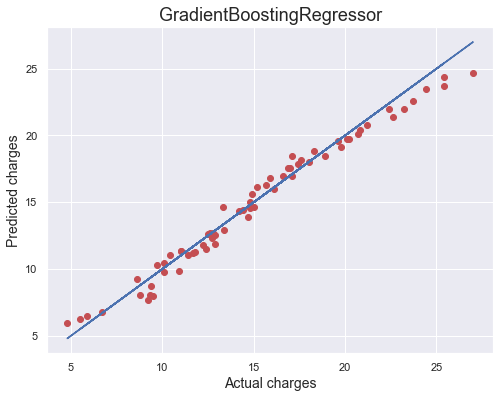

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=GCV_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()